# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [20]:
import requests

In [22]:
# Resolver acá

#Variable que determina que voy a buscar en la API
buscar = "DDJ-FLX4"


url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

# Hacemos el pedido y obtenemos la response
response = requests.request("GET", url)
response.text

'{"site_id":"MLA","country_default_time_zone":"GMT-03:00","query":"DDJ-FLX4","paging":{"total":40,"primary_results":34,"offset":0,"limit":50},"results":[{"id":"MLA1532581328","title":"Pioneer Ddj-flx4 Controlador Dj De 2 Canales Negro","condition":"new","thumbnail_id":"962300-MLU72610602705_112023","catalog_product_id":"MLA23145920","listing_type_id":"gold_pro","sanitized_title":"pioneer-ddj-flx4-controlador-dj-de-2-canales-negro","permalink":"https://www.mercadolibre.com.ar/pioneer-ddj-flx4-controlador-dj-de-2-canales-negro/p/MLA23145920#wid=MLA1532581328&sid=unknown","buying_mode":"buy_it_now","site_id":"MLA","category_id":"MLA44408","domain_id":"MLA-DJ_CONTROLLERS","thumbnail":"http://http2.mlstatic.com/D_962300-MLU72610602705_112023-I.jpg","currency_id":"ARS","order_backend":1,"price":799799.14,"original_price":929999,"sale_price":{"price_id":"","amount":799799.14,"conditions":{"eligible":true,"context_restrictions":["channel_marketplace"],"start_time":"2024-07-01T03:00:00Z","end_t

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [24]:
# Resolver acá
# Hago un data frame con Json
df_ml = response.json()
df_ml

import pandas as pd

# Guardo los precios en una variable 
precios = [producto['price'] for producto in df_ml['results']]

# Creo un df con la columna precio y le agrego los precios del producto
df_precios = pd.DataFrame({"Precio": precios})

# Muestro el df
df_precios

# Busco el máximo, el minimo y el promedio
max = df_precios.max()
print("Máximo:", max)

min = df_precios.min()
print("Mínimo:", min)

prom = df_precios.mean()
print("Promedio:", prom)


Máximo: Precio    1899999.05
dtype: float64
Mínimo: Precio    550000.0
dtype: float64
Promedio: Precio    906613.379737
dtype: float64


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

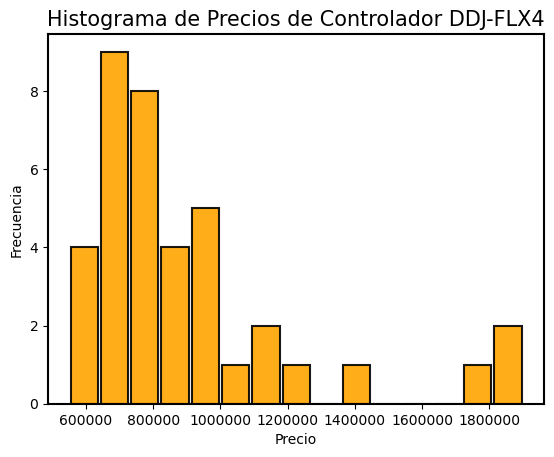

In [28]:
# Resolver acá

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

precio_histo = df_precios['Precio']

plt.hist(precio_histo, bins=15, color='orange',edgecolor='black',linewidth=1.5, alpha=0.9, histtype='bar',rwidth=0.9)   

#Busco una linea de código que permita cambiar los valores del eje x al valor original, con el módulo ticker
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.title('Histograma de Precios de Controlador DDJ-FLX4', fontsize=15,) #color='darkblue')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Cambio el grosor de las lineas
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)

#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [31]:
# Resolver acá

'''
Quiero clasificar en categorias a los productos mas vendidos de Mercado Libre Argentina
'''

site_id = 'MLA'  # Mercado Libre Argentina
query = 'sold_quantity_desc'  # Busco los productos mas vendidos
url = f'https://api.mercadolibre.com/sites/{site_id}/search?q={query}&sort=sold_quantity_desc'

response = requests.get(url)
dic_best_sellers = response.json()

In [40]:
#Armo las variables de las distintas caracteristicas de los productos
precios = [producto['price'] for producto in dic_best_sellers['results']]
codigo = [producto['category_id'] for producto in dic_best_sellers['results']]
producto =  [producto['title'] for producto in dic_best_sellers['results']]
estado = [producto['condition'] for producto in dic_best_sellers['results']]
id  = [producto['id'] for producto in dic_best_sellers['results']]

df_best_sellers = pd.DataFrame({"Precio": precios, 'Código': codigo, 'Nombre': producto, 'Estado': estado, 'ID': id})

In [42]:
df_best_sellers

,Precio,Código,Nombre,Estado,ID
0,23085.00,MLA412445,"El Sol, La Luna Y Las Estrellas - Marta Santes...",new,MLA1646310322
1,13794.07,MLA412445,Vamos A Calentar El Sol,new,MLA1802697096
2,40983.67,MLA1174,Mccullough Chad / Weijters Bram Abstract Quant...,new,MLA701832009
3,17704.90,MLA3422,Topo Gigio De La Suerte - Rayito De Sol Goma 5...,used,MLA823659779
4,132564.00,MLA412445,Order Quantity Forecasting For The Fashion Ind...,new,MLA835663013
5,184339.00,MLA412445,Civil Engineering Quantities - Ivor H. Seeley,new,MLA845874272
6,240597.00,MLA412445,A Neural Network Approach To Fluid Quantity Me...,new,MLA847640699
7,65876.00,MLA412445,The Reign Of Quantity And The Signs Of The Tim...,new,MLA848266439
8,9000.00,MLA434385,Foto Antigua Soldados Regimiento Dec. Del 40.,used,MLA862571493
9,4500.00,MLA2061,Peru Lote 4 Monedas Diferentes 10 Centavos A 1...,used,MLA879668720


In [44]:

#Función que te dice el nombre de la categoría de acuerdo al código
def obtener_nombre_categoria(category_id):
    url = f"https://api.mercadolibre.com/categories/{category_id}"
    response = requests.get(url)
    datos_url = response.json()
    return datos_url['name']  


In [46]:
obtener_nombre_categoria('MLA1955')

'Revistas'

In [48]:
#Hago un dataframe nuevo con los nombres de las categorías y lo agrego a la tabla
df_categorias = df_best_sellers['Código']
df_nombres = df_categorias.apply(obtener_nombre_categoria)


In [49]:
df_nombres

0                   Libros Físicos
1                   Libros Físicos
2                           Música
3      Muñecos y Figuras de Acción
4                   Libros Físicos
5                   Libros Físicos
6                   Libros Físicos
7                   Libros Físicos
8                            Fotos
9                          Monedas
10                     Estampillas
11                  Libros Físicos
12                  Libros Físicos
13                           Fotos
14                  Libros Físicos
15                  Libros Físicos
16                  Libros Físicos
17                  Libros Físicos
18                  Libros Físicos
19                 Sets de Muñecos
20                  Libros Físicos
21                  Libros Físicos
22                        Revistas
23                        Revistas
24                  Libros Físicos
25               Películas Físicas
26                  Libros Físicos
27                  Libros Físicos
28                  

In [50]:
df_best_sellers['Categoría'] = df_nombres

In [51]:
df_best_sellers

,Precio,Código,Nombre,Estado,ID,Categoría
0,23085.00,MLA412445,"El Sol, La Luna Y Las Estrellas - Marta Santes...",new,MLA1646310322,Libros Físicos
1,13794.07,MLA412445,Vamos A Calentar El Sol,new,MLA1802697096,Libros Físicos
2,40983.67,MLA1174,Mccullough Chad / Weijters Bram Abstract Quant...,new,MLA701832009,Música
3,17704.90,MLA3422,Topo Gigio De La Suerte - Rayito De Sol Goma 5...,used,MLA823659779,Muñecos y Figuras de Acción
4,132564.00,MLA412445,Order Quantity Forecasting For The Fashion Ind...,new,MLA835663013,Libros Físicos
5,184339.00,MLA412445,Civil Engineering Quantities - Ivor H. Seeley,new,MLA845874272,Libros Físicos
6,240597.00,MLA412445,A Neural Network Approach To Fluid Quantity Me...,new,MLA847640699,Libros Físicos
7,65876.00,MLA412445,The Reign Of Quantity And The Signs Of The Tim...,new,MLA848266439,Libros Físicos
8,9000.00,MLA434385,Foto Antigua Soldados Regimiento Dec. Del 40.,used,MLA862571493,Fotos
9,4500.00,MLA2061,Peru Lote 4 Monedas Diferentes 10 Centavos A 1...,used,MLA879668720,Monedas


In [52]:
#Cuento la cantidad de items para cada categoria
cantidad_categorias = df_best_sellers['Categoría'].value_counts()
print(cantidad_categorias)

Categoría
Libros Físicos                  38
Fotos                            2
Revistas                         2
Música                           1
Muñecos y Figuras de Acción      1
Monedas                          1
Estampillas                      1
Sets de Muñecos                  1
Películas Físicas                1
Soldaditos                       1
Vehículos Sin Control Remoto     1
Name: count, dtype: int64


In [53]:
#Hago un Df solo para libros fisicos
df_libros_fisicos = df_best_sellers[df_best_sellers['Categoría'] == 'Libros Físicos']
df_libros_fisicos = df_libros_fisicos.drop(columns=['Código'])

In [60]:
df_libros_fisicos

,Precio,Nombre,Estado,ID,Categoría
0,23085.00,"El Sol, La Luna Y Las Estrellas - Marta Santes...",new,MLA1646310322,Libros Físicos
1,13794.07,Vamos A Calentar El Sol,new,MLA1802697096,Libros Físicos
4,132564.00,Order Quantity Forecasting For The Fashion Ind...,new,MLA835663013,Libros Físicos
5,184339.00,Civil Engineering Quantities - Ivor H. Seeley,new,MLA845874272,Libros Físicos
6,240597.00,A Neural Network Approach To Fluid Quantity Me...,new,MLA847640699,Libros Físicos
7,65876.00,The Reign Of Quantity And The Signs Of The Tim...,new,MLA848266439,Libros Físicos
11,171793.00,Quantity Discounts : An Overview And Practical...,new,MLA911084929,Libros Físicos
12,189426.00,The Metaphysics Of Quantities - J. E. Wolff,new,MLA928436544,Libros Físicos
14,120230.00,"Data Design : Visualising Quantities, Location...",new,MLA1109929471,Libros Físicos
15,74580.00,Unknown Quantity : A Real And Imaginary Histor...,new,MLA1112346717,Libros Físicos


In [206]:
df_libros_ordenado = df_libros_fisicos.sort_values(by='Precio', ascending=False)

In [208]:
# Saco precios maximos y minimos

max2 = df_libros_fisicos['Precio'].max()
min2 = df_libros_fisicos['Precio'].min()

# Encuentro el libro más caro
libro_caro = df_libros_fisicos[df_libros_fisicos['Precio'] == max2]
nombre_libro_caro = libro_caro['Nombre'].iloc[0] if not libro_caro.empty else 'No disponible'

# Encuentro el libro más barato
libro_barato = df_libros_fisicos[df_libros_fisicos['Precio'] == min2]
nombre_libro_barato = libro_barato['Nombre'].iloc[0] if not libro_barato.empty else 'No disponible'

print("Libro más barato:", nombre_libro_barato, min2)
print("Libro más caro:", nombre_libro_caro , max2)

Libro más barato: Radiation Quantities And Units: International Commission On Radiological Units And Measurements (..., De Anonymous. Editorial Hassell Street Pr, Tapa Blanda En Inglés 27045.0
Libro más caro: Libro Quantity And Prosodic Asymmetries In Alemannic : Sy... 330195.0
